In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import cross_val_predict

In [2]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Feature Engineering

In [5]:
def create_dummies(df, colname):
    dummy_df = pd.get_dummies(df[colname], prefix=colname)
    df = pd.concat([df, dummy_df], axis=1)
#     df = df.drop([colname], axis=1)
    return df 


In [6]:
train = create_dummies(train, 'Pclass')

In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


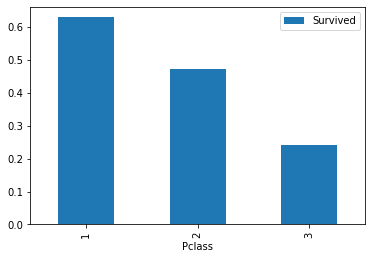

In [8]:
pclass_pivot = train.pivot_table(index='Pclass', values='Survived')
pclass_pivot.plot.bar()
plt.show()

In [9]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

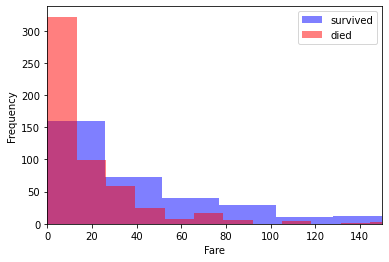

In [10]:
survived_fare = train[train['Survived'] == 1]
died_fare = train[train['Survived'] == 0]

survived_fare['Fare'].plot.hist(alpha=0.5, color='blue', label='survived', bins=20)
died_fare['Fare'].plot.hist(alpha=0.5, color='red', label='died', bins=20)
plt.xlim(0, 150)
plt.xlabel('Fare')
plt.legend()
plt.show()

In [11]:
def process_fare(df):
    label_names = ['0-30', '30-60', '60-100', '100+']
    cut_points = [0, 30, 60, 100, 1000]
    df['Fare_categories'] = pd.cut(df['Fare'], cut_points, labels=label_names)
    return df


In [12]:
train = process_fare(train)
holdout = process_fare(holdout)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Fare_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,60-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,30-60
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0-30


In [14]:
train = create_dummies(train, 'Fare_categories')

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Fare_categories,Fare_categories_0-30,Fare_categories_30-60,Fare_categories_60-100,Fare_categories_100+
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0-30,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,60-100,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0-30,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,30-60,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0-30,1,0,0,0


In [16]:
train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

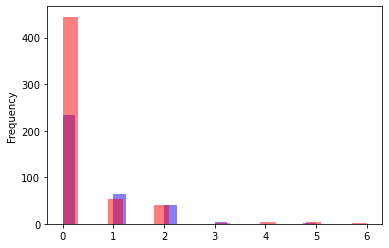

In [17]:
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]

survived['Parch'].plot.hist(alpha=0.5, color='blue', bins=20)
died['Parch'].plot.hist(alpha=0.5, color='red', bins=20)
plt.show()

In [18]:
def process_parch(df):
    label_names = ['0', '1', '2', '3', '4+']
    cut_points = [-1, 0, 1, 2, 3, 10]
    df['Parch_categories'] = pd.cut(df['Parch'], cut_points, labels=label_names)
    return df


In [19]:
train = process_parch(train)
holdout = process_parch(holdout)

In [20]:
train['Parch_categories'].value_counts()

0     678
1     118
2      80
4+     10
3       5
Name: Parch_categories, dtype: int64

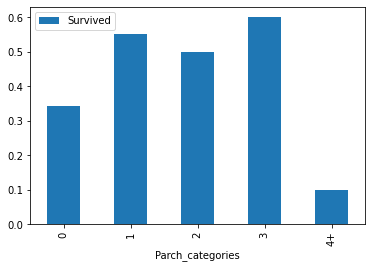

In [21]:
parch_pivot = train.pivot_table(index='Parch_categories', values='Survived')
parch_pivot.plot.bar()
plt.show()

<AxesSubplot:ylabel='Frequency'>

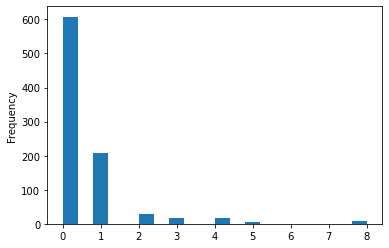

In [22]:
train['SibSp'].plot.hist(bins=20)

In [23]:
def process_sib(df):
    cut_points = [-1, 0, 1, 2, 3, 4, 5, 10]
    label_values = ['0', '1', '2', '3', '4', '5', '6+']
    df['SibSp_categories'] = pd.cut(df['SibSp'], cut_points, labels=label_values)
    return df
    

In [24]:
train = process_sib(train)
holdout = process_sib(holdout)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_1,Pclass_2,Pclass_3,Fare_categories,Fare_categories_0-30,Fare_categories_30-60,Fare_categories_60-100,Fare_categories_100+,Parch_categories,SibSp_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0-30,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,60-100,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0-30,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,30-60,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0-30,1,0,0,0,0,0


In [25]:
train = create_dummies(train, 'SibSp_categories')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_categories_100+,Parch_categories,SibSp_categories,SibSp_categories_0,SibSp_categories_1,SibSp_categories_2,SibSp_categories_3,SibSp_categories_4,SibSp_categories_5,SibSp_categories_6+
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,1,0,0,0,0,0,0


In [26]:
def process_age(df, cut_points, label_values):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_categories'] = pd.cut(df['Age'], cut_points, labels=label_values)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_values= ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']


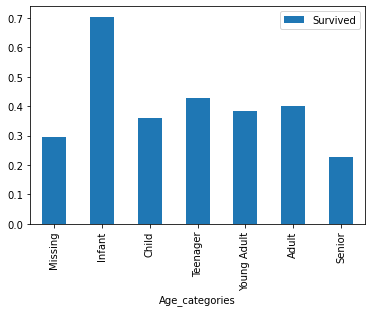

In [27]:
train = process_age(train, cut_points, label_values)
holdout = process_age(holdout, cut_points, label_values)

pivot = train.pivot_table(index='Age_categories', values='Survived')
pivot.plot.bar()
plt.show()


In [28]:
train = create_dummies(train, 'Sex')
train = create_dummies(train, 'Age_categories')
train = create_dummies(train, 'Parch_categories')

holdout = create_dummies(holdout, 'Sex')
holdout = create_dummies(holdout, 'Pclass')
holdout = create_dummies(holdout, 'Age_categories')
holdout = create_dummies(holdout, 'Parch_categories')
holdout = create_dummies(holdout, 'Fare_categories')
holdout = create_dummies(holdout, 'SibSp_categories')


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Parch_categories_0,Parch_categories_1,Parch_categories_2,Parch_categories_3,Parch_categories_4+
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,1,0,0,0,0


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Cabin                       204 non-null    object  
 11  Embarked                    889 non-null    object  
 12  Pclass_1                    891 non-null    uint8   
 13  Pclass_2            

In [30]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 418 non-null    int64   
 1   Pclass                      418 non-null    int64   
 2   Name                        418 non-null    object  
 3   Sex                         418 non-null    object  
 4   Age                         418 non-null    float64 
 5   SibSp                       418 non-null    int64   
 6   Parch                       418 non-null    int64   
 7   Ticket                      418 non-null    object  
 8   Fare                        417 non-null    float64 
 9   Cabin                       91 non-null     object  
 10  Embarked                    418 non-null    object  
 11  Fare_categories             415 non-null    category
 12  Parch_categories            418 non-null    category
 13  SibSp_categories    

In [31]:
train.shape

(891, 44)

In [32]:
holdout.shape

(418, 43)

In [33]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Fare_categories', 'Fare_categories_0-30',
       'Fare_categories_30-60', 'Fare_categories_60-100',
       'Fare_categories_100+', 'Parch_categories', 'SibSp_categories',
       'SibSp_categories_0', 'SibSp_categories_1', 'SibSp_categories_2',
       'SibSp_categories_3', 'SibSp_categories_4', 'SibSp_categories_5',
       'SibSp_categories_6+', 'Age_categories', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Parch_categories_0', 'Parch_categories_1',
       'Parch_categories_2', 'Parch_categories_3', 'Parch_categories_4+'],
      dtype='object')

# Feature Selection 

In [34]:
# eliminated: passengerId, name, sex, ticket, cabin, embarked, 

In [35]:
from sklearn.model_selection import train_test_split

columns = ['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Fare_categories_0-30',
       'Fare_categories_30-60', 'Fare_categories_60-100',
       'Fare_categories_100+',
       'SibSp_categories_0', 'SibSp_categories_1', 'SibSp_categories_2',
       'SibSp_categories_3', 'SibSp_categories_4', 'SibSp_categories_5',
       'SibSp_categories_6+', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Parch_categories_0', 'Parch_categories_1',
       'Parch_categories_2', 'Parch_categories_3', 'Parch_categories_4+']

all_X = train[columns]
all_Y = train['Survived']


train_X, test_X, train_Y, test_Y = train_test_split(all_X, all_Y, test_size=0.2, random_state=0)


In [36]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(train_X, train_Y)

predictions = lr.predict(test_X)
accuracy = accuracy_score(test_Y, predictions)

print(accuracy)



0.8156424581005587


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# try using minmax scaling

# from sklearn.preprocessing import minmax_scale




/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


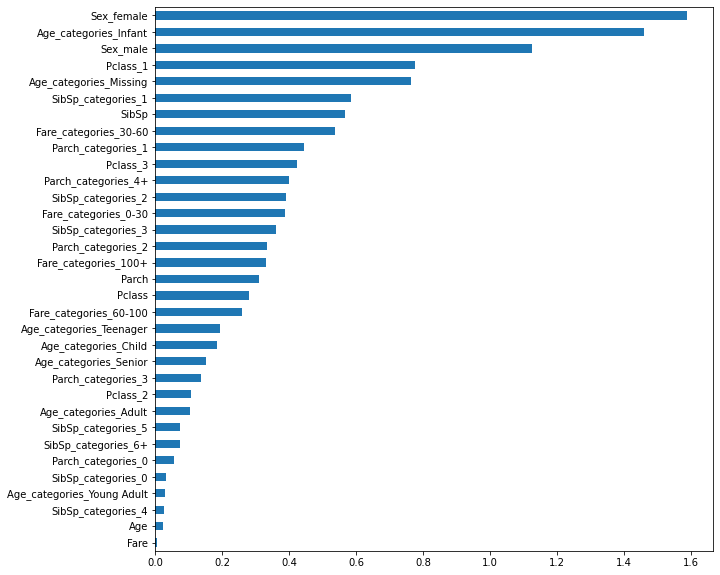

In [38]:
lr = LogisticRegression()
lr.fit(all_X, all_Y)
coefficients = lr.coef_

important_feats = pd.Series(coefficients[0], index=columns)
most_important_feats = important_feats.abs().sort_values()

f = plt.figure(figsize=[10, 10])
most_important_feats.plot.barh()

plt.show()

In [39]:
lame_cols = ['Sex_female', 'Age_categories_Infant', 
             'Sex_male', 'Pclass_1', 'Age_categories_Missing', 'SibSp_categories_1', 
             'SibSp', 'Fare_categories_30-60']

lr = LogisticRegression()
lr.fit(train_X[lame_cols], train_Y)

predictions = lr.predict(test_X[lame_cols])
accuracy = accuracy_score(test_Y, predictions)
print(accuracy)

0.7988826815642458


In [40]:
from sklearn.model_selection import cross_val_score
lame_cols = ['Sex_female', 'Age_categories_Infant', 
            'Pclass_1', 'Age_categories_Missing', 'SibSp_categories_1', 
             'SibSp', 'Fare_categories_30-60']

all_X = train[lame_cols]
all_Y = train['Survived']

lr = LogisticRegression()


scores = cross_val_score(lr, all_X, all_Y, cv=10)
accuracy = scores.mean()
print(accuracy)

# from sklearn.model_selection import cross_val_score

# columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
#        'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

# all_X = train[columns]
# all_y = train['Survived']

# lr = LogisticRegression()
# scores = cross_val_score(lr, all_X, all_y, cv=10)
# accuracy = scores.mean()

# print(accuracy)
# accuracy of 81: time to test the model

0.8091635455680398


In [41]:
from sklearn.feature_selection import RFECV

columns = ['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Fare_categories_0-30',
       'Fare_categories_30-60', 'Fare_categories_60-100',
       'Fare_categories_100+',
       'SibSp_categories_0', 'SibSp_categories_1', 'SibSp_categories_2',
       'SibSp_categories_3', 'SibSp_categories_4', 'SibSp_categories_5',
       'SibSp_categories_6+', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Parch_categories_0', 'Parch_categories_1',
       'Parch_categories_2', 'Parch_categories_3', 'Parch_categories_4+']

lr = LogisticRegression()

all_X = train[columns]
all_Y = train['Survived']

lr = LogisticRegression()
selector = RFECV(lr, cv=10)
selector.fit(all_X, all_Y)

optimal_features = all_X.columns[selector.support_]



/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [56]:
optimal_features




Index(['Pclass', 'SibSp', 'SibSp_categories_1', 'SibSp_categories_2',
       'SibSp_categories_3', 'Sex_female', 'Sex_male', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Adult', 'Age_categories_Senior',
       'Parch_categories_4+'],
      dtype='object')

In [57]:
all_X = train[optimal_features]
all_Y = train['Survived']

lr = LogisticRegression()
lr.fit(all_X, all_Y)
scores = cross_val_score(lr, all_X, all_Y, cv=10)
accuracy = scores.mean()
print(accuracy)

0.8136953807740326


In [58]:
all_X = train[optimal_features]
all_Y = train['Survived']

lr = LogisticRegression()
lr.fit(all_X, all_Y)

holdout_predictions = lr.predict(holdout[optimal_features])

submission = {
    'PassengerId': holdout['PassengerId'],
    'Survived': holdout_predictions
}

submission_df = pd.DataFrame(submission)
submission_df.to_csv('submission_lucas_1.csv', index=False)



I focused on feature engineering and selection for this submission. 

For feature engineering, I generated new features using binning for columns that had continuous data (like age and fare), then took those new features and created dummy variables for each bin. 

For feature selection, I compared using the .coef_ attribute of the standard sklearn Logistic Regression model and hand-picking the top coefficients against using the RFECV model supplied in the sklearn.feature_engineering module, with a cross-validation fold value of 10. 

In [61]:
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
# from sklearn.feature_selection import RFECV

# columns = ['Age_categories_Missing', 'Age_categories_Infant',
#        'Age_categories_Child', 'Age_categories_Young Adult',
#        'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
#        'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
#        'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
#        'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
#        'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
#        'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
#        'Cabin_type_T', 'Cabin_type_Unknown']

# all_X = train[columns]
# all_y = train["Survived"]

# lr = LogisticRegression()
# selector = RFECV(lr, step=1, cv=10)
# selector.fit(all_X, all_y)

# optimize_columns = all_X.columns[selector.support_]
# rankings = selector.ranking_

# Model 

In [43]:
from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 
           'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child', 
           'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 
           'Age_categories_Senior']

all_X = train[columns]
all_Y = train['Survived']

train_X, test_X, train_Y, test_Y = train_test_split(all_X, all_Y, test_size=0.2, random_state=0)




In [44]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(train_X, train_Y)

predictions = lr.predict(test_X)
accuracy = accuracy_score(test_Y, predictions)
accuracy


0.8100558659217877

above is a bad way (only using accuracy score)

below is a good way (using cross fold validation)

In [45]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr.fit(train_X, train_Y)
scores = cross_val_score(lr, all_X, all_Y, cv=10)
accuracy = np.mean(scores)

print(scores, accuracy)

[0.8        0.82022472 0.76404494 0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80898876] 0.8024719101123596


In [46]:
lr = LogisticRegression()
lr.fit(all_X, all_Y)

holdout_predictions = lr.predict(holdout[columns])
holdout_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
holdout_ids = holdout['PassengerId']
submission_df = {
    'PassengerId': holdout_ids,
    'Survived': holdout_predictions
}
submission = pd.DataFrame(submission_df)

In [48]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
from sklearn.preprocessing import minmax_scale
# The holdout set has a missing value in the Fare column which
# we'll fill with the mean.
holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())

train['Embarked'] = train['Embarked'].fillna('S')
holdout['Embarked'] = holdout['Embarked'].fillna('S')

train = create_dummies(train, 'Embarked')
holdout = create_dummies(holdout, 'Embarked')



columns = ['SibSp', 'Parch', 'Fare']


for col in columns:
    train[col + '_scaled'] = minmax_scale(train[col])
    holdout[col + '_scaled'] = minmax_scale(holdout[col])

# this is what minmax scale does behind the scenes
# normalized = (x - min(x)) / (max(x) - min(x))
# z-score normalization: (x - mean) / std_dev


This finds only the strongest features

In [50]:
# columns = ['Age_categories_Missing', 'Age_categories_Infant',
#        'Age_categories_Child', 'Age_categories_Teenager',
#        'Age_categories_Young Adult', 'Age_categories_Adult',
#        'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
#        'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
#        'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

# lr = LogisticRegression()
# lr.fit(train[columns], train['Survived'])
# coefficients = lr.coef_

# feature_importance = pd.Series(coefficients[0], index=columns)

# feature_importance.plot.barh()
# plt.show()

In [51]:
# from sklearn.model_selection import cross_val_score

# columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
#        'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

# all_X = train[columns]
# all_y = train['Survived']

# lr = LogisticRegression()
# scores = cross_val_score(lr, all_X, all_y, cv=10)
# accuracy = scores.mean()

# print(accuracy)
# accuracy of 81: time to test the model

In [52]:
# columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
#        'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

# all_X = train[columns]
# all_y = train['Survived']

# lr = LogisticRegression()
# lr.fit(all_X, all_y)
# holdout_predictions = lr.predict(holdout[columns])

# submission_df = {
#     'PassengerId': holdout['PassengerId'], 
#     'Survived': holdout_predictions
#     }

# submission = pd.DataFrame(submission_df)

# submission.to_csv('submission_1.csv', index=False)


#this gets a 77%

## next attempt

In [53]:
# def process_age(df,cut_points,label_names):
#     df["Age"] = df["Age"].fillna(-0.5)
#     df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
#     return df

# def process_fare(df, cut_points, label_names):
#     df['Fare_categories'] = pd.cut(df['Fare'], cut_points, labels=label_names)
#     return df

# cut_points = [0, 12, 50, 100, 1000]
# label_names = ['0-12', '12-50', '50-100', '100+']

# train = process_fare(train, cut_points, label_names)
# holdout = process_fare(holdout, cut_points, label_names)


# train = create_dummies(train, 'Fare_categories')
# holdout= create_dummies(holdout, 'Fare_categories')

In [54]:
# titles = {
#     "Mr" :         "Mr",
#     "Mme":         "Mrs",
#     "Ms":          "Mrs",
#     "Mrs" :        "Mrs",
#     "Master" :     "Master",
#     "Mlle":        "Miss",
#     "Miss" :       "Miss",
#     "Capt":        "Officer",
#     "Col":         "Officer",
#     "Major":       "Officer",
#     "Dr":          "Officer",
#     "Rev":         "Officer",
#     "Jonkheer":    "Royalty",
#     "Don":         "Royalty",
#     "Sir" :        "Royalty",
#     "Countess":    "Royalty",
#     "Dona":        "Royalty",
#     "Lady" :       "Royalty"
# }

# extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
# train["Title"] = extracted_titles.map(titles)

# extracted_hold_titles = holdout['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# holdout['Title'] = extracted_hold_titles.map(titles)

# train['Cabin_type'] = train['Cabin'].str[0]
# train['Cabin_type'] = train['Cabin_type'].fillna('Unknown')

# holdout['Cabin_type'] = holdout['Cabin'].str[0]
# holdout['Cabin_type'] = holdout['Cabin_type'].fillna('Unknown')

# train = create_dummies(train, 'Title')
# holdout = create_dummies(holdout, 'Title')

# train = create_dummies(train, 'Cabin_type')
# holdout = create_dummies(holdout, 'Cabin_type')

identify and remove collinearity. This is often generated by the creation of dummy features.

In [55]:
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']

plot_correlation_heatmap(train[columns])


KeyError: "['Title_Mrs', 'Fare_categories_50-100', 'Cabin_type_B', 'Cabin_type_F', 'Title_Royalty', 'Cabin_type_E', 'Title_Master', 'Cabin_type_Unknown', 'Cabin_type_A', 'Fare_categories_12-50', 'Cabin_type_D', 'Title_Miss', 'Cabin_type_T', 'Cabin_type_C', 'Title_Mr', 'Fare_categories_0-12', 'Cabin_type_G', 'Title_Officer'] not in index"

"We can see that there is a high correlation between Sex_female/Sex_male and Title_Miss/Title_Mr/Title_Mrs. We will remove the columns Sex_female and Sex_male since the title data may be more nuanced.

Apart from that, we should remove one of each of our dummy variables to reduce the collinearity in each. We'll remove:

- Pclass_2
- Age_categories_Teenager
- Fare_categories_12-50
- Title_Master
- Cabin_type_A
"

This is a great way to determine which features you should use. Use the feature_selection module in sklearn. 

RFECV is Recursive Feature Elimination with Cross Validation. It will tell you what the best features are to use, of the given features you supply. 

It does not mean it's optimized, though. You still need to supply/engineer the best features going into this process.

In [ ]:
# from sklearn.feature_selection import RFECV

# columns = ['Age_categories_Missing', 'Age_categories_Infant',
#        'Age_categories_Child', 'Age_categories_Young Adult',
#        'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
#        'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
#        'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
#        'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
#        'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
#        'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
#        'Cabin_type_T', 'Cabin_type_Unknown']

# all_X = train[columns]
# all_y = train["Survived"]

# lr = LogisticRegression()
# selector = RFECV(lr, step=1, cv=10)
# selector.fit(all_X, all_y)

# optimize_columns = all_X.columns[selector.support_]
# rankings = selector.ranking_


By preparing, engineering and selecting features, we have increased our accuracy by 2.4%. When working in Kaggle competitions, you should spend a lot of time experimenting with features, particularly feature engineering.

Here are some ideas that you can use to work with features for this competition:

- Use SibSp and Parch to explore total relatives onboard.
- Create combinations of multiple columns, for instance Pclass + Sex.
- See if you can extract useful data out of the Ticket column.
- Try different combinations of features to see if you can identify features that overfit less than others.


Binning is a great way to approach feature engineering.

great feature engineering resource: https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

In [ ]:
# train = train.drop('Cabin', axis=1)

In [ ]:
# train = train.dropna()

In [ ]:
# test = test.drop('Cabin', axis=1)

In [ ]:
# test = test.dropna()

In [ ]:
# train_categorical = train.select_dtypes(include=['object'])
# train_categorical

In [ ]:
# dummy_df = pd.get_dummies(train[['Sex', 'Embarked']])
# train = pd.concat([train, dummy_df], axis=1)
# train = train.drop(['Sex', 'Embarked'], axis=1)
# train.head()

In [ ]:
# dummy_test_df = pd.get_dummies(test[['Sex', 'Embarked']])
# test= pd.concat([test, dummy_test_df], axis=1)
# test = test.drop(['Sex', 'Embarked'], axis=1)
# test.head()

In [ ]:
# train.corr()['Survived'].abs().sort_values(ascending=False)

In [ ]:
# hm = (train['Sex_male'] == 0) & (train['Survived'] == 1)
# hm.value_counts()

In [ ]:
# def lr_train_and_test(train, test):
    
#     features = train.columns.drop(['PassengerId', 'Survived'])
#     target = 'Survived'
#     lr = LogisticRegression(class_weight='balanced')
#     lr.fit(features, target)
    
   
#     predictions = cross_val_predict(features, target)
#     predictions = pd.Series(predictions)
    
#     return predictions
    
    
    
    

In [ ]:
# train.info()

In [ ]:
# def lr_train_and_test(train, test):
    
#     features = train.columns.drop(['Name', 'Ticket', 'Survived'])
#     target = 'Survived'
    
#     lr = LogisticRegression(random_state=1)
    
#     lr.fit(train[features], train[target])
    
#        #need to use .predict_proba? 
#     predictions = lr.predict(train[features])
#     predictions = pd.Series(predictions)
    
#     return predictions



# for linear:
# lr = linearregression(random_state=1)
# lr.fit(train[features], train[target])
# predictions = lr.predict(test[features])
# mse = mean_squared_error(test[target], predictions)
# rmse = np.sqrt(mse)

# from documentation on logistic:
# >>> from sklearn.datasets import load_iris
# >>> from sklearn.linear_model import LogisticRegression
# >>> X, y = load_iris(return_X_y=True)
# >>> clf = LogisticRegression(random_state=0).fit(X, y)
# >>> clf.predict(X[:2, :])
# array([0, 0])
# >>> clf.predict_proba(X[:2, :])
# array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
#        [9.7...e-01, 2.8...e-02, ...e-08]])
# >>> clf.score(X, y)
# 0.97...

In [ ]:
# lr_train_and_test(train, test)